In [1]:
using ModelingToolkit
using DifferentialEquations
using Plots

# Simplified Example

In [2]:
@variables t x(t) RHS(t) 
@parameters τ

1-element Vector{Num}:
 τ

In [3]:
D = Differential(t) # define differentiation operator w.r.t. time

(::Differential) (generic function with 2 methods)

In [4]:
@named fol_separate = ODESystem([
        RHS ~ (1-x)/τ, 
        D(x) ~ RHS
        ])

Model fol_separate with 2 equations
States (2):
  x(t)
  RHS(t)
Parameters (1):
  τ

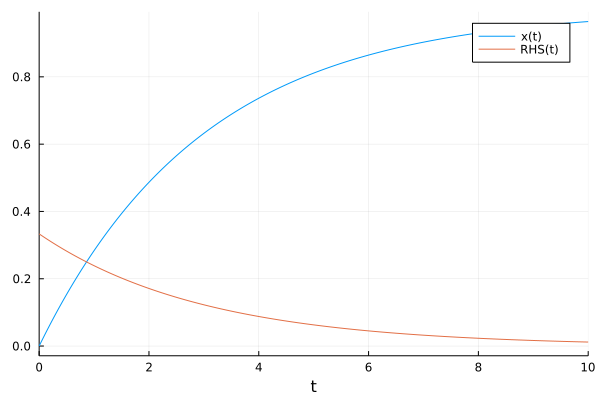

In [5]:
prob = ODEProblem(
    structural_simplify(fol_separate),
    [x => 0.0],
    (0.0, 10.0),
    [τ => 3.0]
)

sol = solve(prob) 

plot(sol, vars=[x, RHS])

# Registering Functions 

What if we want to embed data as a forcing function? MTK allows us to register functions that are excluded from symbolic transformations. That way you could interpolate a time series for example. 

In [13]:
value_vector = randn(10) 
f_fun(t) = t >= 10 ? value_vector[end] : value_vector[Int(floor(t))+1]

@register_symbolic f_fun(t)

In [14]:
@variables f(t) 

@named fol_external_f = ODESystem([
        f ~ f_fun(t), 
        D(x) ~ (f-x)/τ
        ])

Model fol_external_f with 2 equations
States (2):
  x(t)
  f(t)
Parameters (1):
  τ

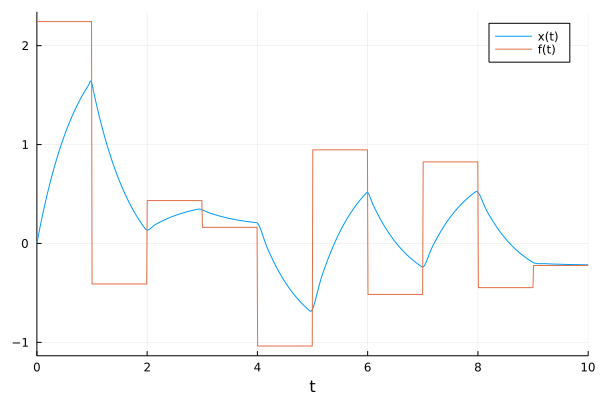

In [15]:
prob = ODEProblem(structural_simplify(fol_external_f), [x=>0.0], (0.0,10.0), [τ=>0.75])
sol = solve(prob) 

plot(sol, vars=[x, f])